In [56]:
import utility_common as common
from utility_dfcutter import *
from utility_dfplotter import *
import glob
binedges = [15,17,20,25,30,40,50]

In [58]:
# QCD->electron
selection, folderOfPickles = "mumue", "pickles_2016_llx_VTtau"
pickleDirectry = common.getBaseDirectory() + "data/{}/{}/".format(folderOfPickles,selection)
cuts = "lepton1_pt>25 & lepton2_pt>15 & lepton3_pt > 15 & lepton3_mt < 60 & nProbs == 1"
subtitle = r"$Z (\mu \mu)+\tilde{e}$"
configs  = [('lepton3_reliso',0,0.3,0.01,r'$iso_{\tilde{e}}$'),
            ('dilepton_mass',60,121,2,r'$m_{\mu\mu}$ [GeV]'),
            ('dilepton_pt',0,161,5,r'$p^T_{\mu\mu}$ [GeV]'),
            ('lepton_delta_r',0,6.5,0.2,r'$\delta R (\mu\mu)$'),
            ('lepton3_pt',10,121,5,r'$p^T_{\tilde{e}}$ [GeV]'),
            ('met', 0,121,5,r'met [GeV]'),
            ('lepton3_eta',-3,3.1,0.2,r'$\eta_{\tilde{e}}$'),
            ('lepton3_mt',10,161,5,r'$m^T_{\tilde{e},met}$ [GeV]'),
            ('lepton3_passiso',0,3,1,r'Pass Tight $iso_\tilde{e}$'),
            ('lepton3_dilepton_delta_r',0,6.5,0.2,r'$\delta R (\mu\mu,\tilde{e})$'),
            ('lepton3_dilepton_delta_phi',0,6.5,0.2,r'$\delta \phi (\mu\mu,\tilde{e})$'),
            ('nJets',0,7,1,r'$n_{j}$'),
            ('nBJets',0,7,1,r'$n_{b}$'),
            ('nProbs',0,7,1,r'$n_{\tilde{e}}$'),
           ]
ynormSF = 0.7

In [68]:
# QCD->muon
selection, folderOfPickles = "eemu", "pickles_2016_llx_VTtau"
pickleDirectry = common.getBaseDirectory() + "data/{}/{}/".format(folderOfPickles,selection)
cuts = "lepton1_pt>30 & lepton2_pt>20 & lepton3_pt > 15 & lepton3_mt < 60 & nProbs == 1"
subtitle = r"$Z (e e)+\tilde{\mu}$"
configs  = [('lepton3_reliso',0,2,0.05,r'$iso_{\tilde{\mu}}$'),
            ('dilepton_mass',60,121,2,r'$m_{ee}$ [GeV]'),
            ('dilepton_pt',0,161,5,r'$p^T_{ee}$ [GeV]'),
            ('lepton_delta_r',0,6,0.2,r'$\delta R (ee)$'),
            ('lepton3_pt',10,121,5,r'$p^T_{\tilde{\mu}}$ [GeV]'),
            ('met', 0,121,5,r'met [GeV]'),
            ('lepton3_eta',-3,3.1,0.2,r'$\eta_{\tilde{\mu}}$'),
            ('lepton3_mt',10,161,5,r'$m^T_{\tilde{\mu},met}$ [GeV]'),
            ('lepton3_passiso',0,3,1,r'Pass Tight $iso_\tilde{\mu}$'),
            ('lepton3_dilepton_delta_r',0,6.5,0.2,r'$\delta R (ee,\tilde{\mu})$'),
            ('lepton3_dilepton_delta_phi',0,6.5,0.2,r'$\delta \phi (ee,\tilde{\mu})$'),
            ('nJets',0,7,1,r'$n_{j}$'),
            ('nBJets',0,7,1,r'$n_{b}$'),
            ('nProbs',0,7,1,r'$n_{\tilde{e}}$'),
           ]
ynormSF = 0.2

In [69]:
# data
pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("data"))
data = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
data.reset_index(drop=True, inplace=True)

# top
pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mct"))
pickles.append(pickleDirectry+'mctt/ntuple_ttbar_inclusive.pkl')
mct = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
mct.reset_index(drop=True, inplace=True)

# DY
pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mcw"))
pickles.append(pickleDirectry+'mcz/ntuple_zjets_m-50_amcatnlo.pkl')
mcz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
mcz.reset_index(drop=True, inplace=True)

# ## combining z+jets samples
# files = ['mcz/ntuple_zjets_m-50_amcatnlo.pkl','mcz/ntuple_z0jets_m-50_amcatnlo.pkl',
#          'mcz/ntuple_z1jets_m-50_amcatnlo.pkl','mcz/ntuple_z2jets_m-50_amcatnlo.pkl']

# ratios,ngens = [],[]
# for file in files:
#     temp = pd.read_pickle(pickleDirectry+file)
#     r0 = temp[temp.nPartons==0].eventWeight.sum()/temp.eventWeight.sum()
#     r1 = temp[temp.nPartons==1].eventWeight.sum()/temp.eventWeight.sum()
#     r2 = temp[temp.nPartons>=2].eventWeight.sum()/temp.eventWeight.sum()
#     ratios.append([r0,r1,r2])
#     ngens.append(1/temp.eventWeightSF[0])
# # Nate's number
# ratios = [[0.737, 0.173, 0.091],
#           [0.967, 0.033, 0.],
#           [0.,    1.056, -0.056],
#           [0.,    0.,    1.] ]
# ratios,ngens = np.array(ratios), np.array(ngens)

    
# totals = (ngens * ratios.T).T
# mcz = []
# for i,file in enumerate(files):
#     temp = pd.read_pickle(pickleDirectry+file)
#     temp.loc[temp.nPartons == 0,"eventWeight"] *= totals[i,0]/totals[:,0].sum()
#     temp.loc[temp.nPartons == 1,"eventWeight"] *= totals[i,1]/totals[:,1].sum()
#     temp.loc[temp.nPartons >= 2,"eventWeight"] *= totals[i,2]/totals[:,2].sum()
#     mcz.append(temp)
# mcz = pd.concat(mcz,ignore_index=True).query(cuts)
# mcz.reset_index(drop=True, inplace=True)


# VV
pickles = []
pickles.append(pickleDirectry+'mcdiboson/ntuple_ww.pkl')
pickles.append(pickleDirectry+'mcdiboson/ntuple_wz_2l2q.pkl')
pickles.append(pickleDirectry+'mcdiboson/ntuple_zz_2l2nu.pkl')
pickles.append(pickleDirectry+'mcdiboson/ntuple_zz_2l2q.pkl')
mcvv = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
mcvv.reset_index(drop=True, inplace=True)

# VV prompt
pickles = []
pickles.append(pickleDirectry+'mcdiboson/ntuple_zz_4l.pkl')
mczz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
mczz.reset_index(drop=True, inplace=True)

pickles = []
pickles.append(pickleDirectry+'mcdiboson/ntuple_wz_3lnu.pkl')
mcwz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
mcwz.reset_index(drop=True, inplace=True)

(array([35.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0., 61.]),
 array([11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ]),
 <a list of 10 Patch objects>)

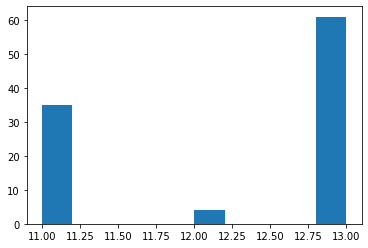

In [48]:
plt.hist(mcz.trTest)

In [33]:
# mcwz.eventWeight *= 1.2
# mczz.eventWeight *= 1.2
# mcz.eventWeight *= 0.85

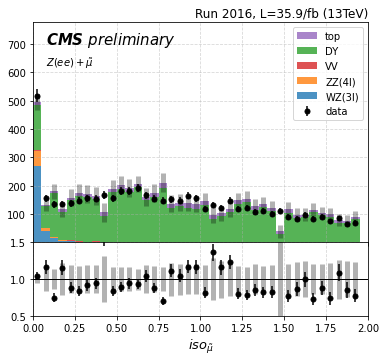

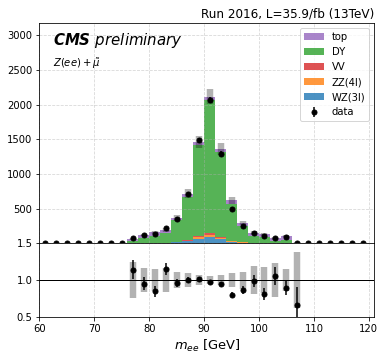

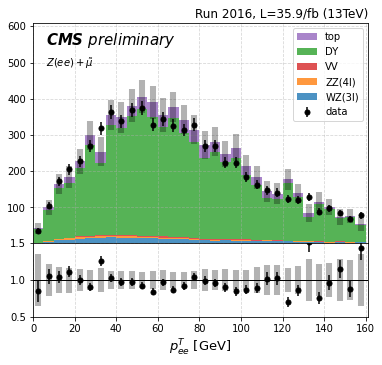

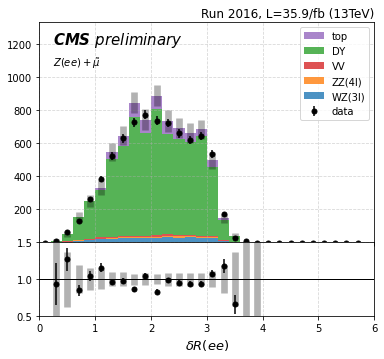

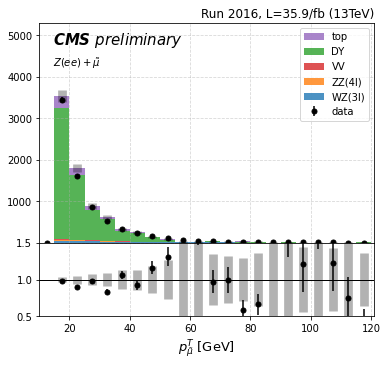

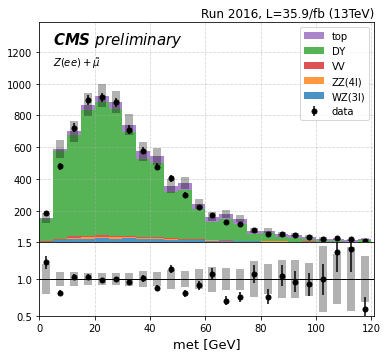

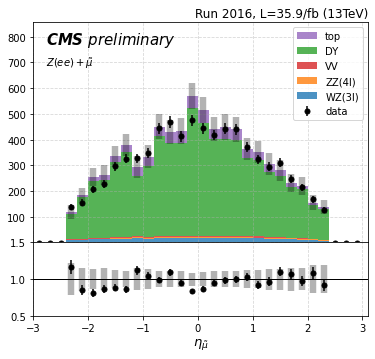

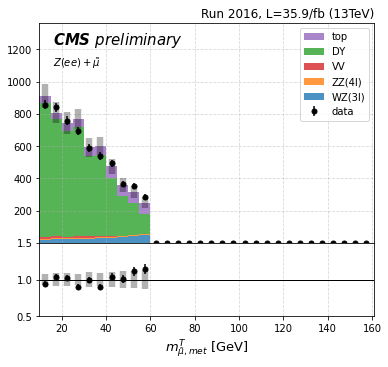

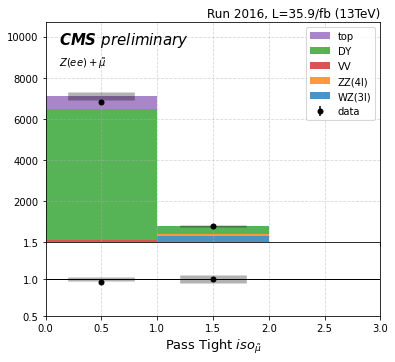

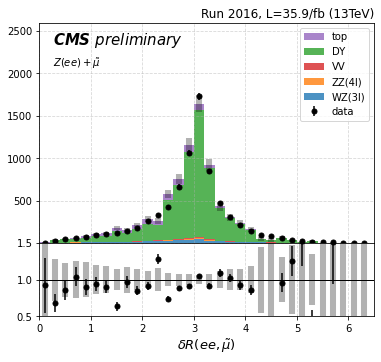

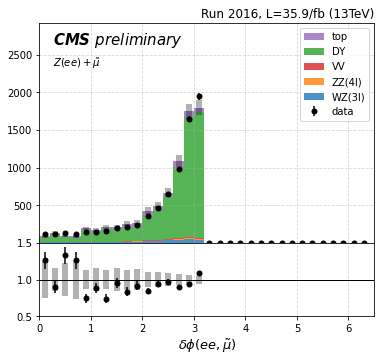

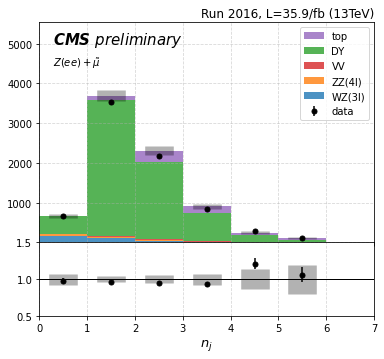

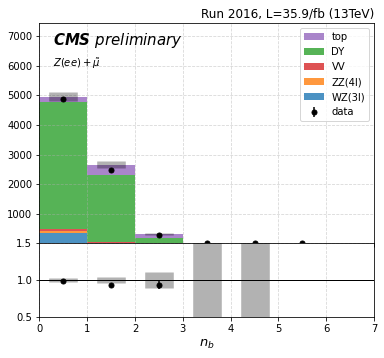

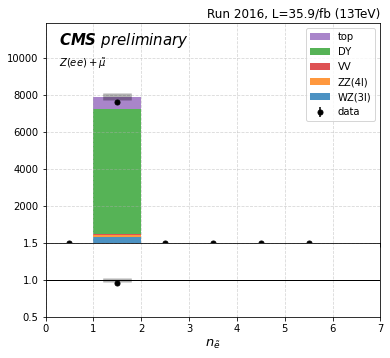

In [70]:
dfList   = [mcwz,mczz,mcvv,mcz,mct,data]
legends  = ['WZ(3l)','ZZ(4l)','VV',"DY","top","data"]
colors   = ["C0", "C1", "C3","C2","C4",'k']

for config in configs:
    v,a,b,step,xl = config
    sk = ASingleKinematicPlot(v,a,b,step,dfList)
    sk.settingPlot(xl,legends,colors)
    sk.makePlot()
    sk.axes[0].text(0.04*sk.b+0.96*sk.a,1.2*sk.ynorm, subtitle)
    #plt.savefig("../plots/kinematics/{}/{}.pdf".format(selection,v))
    plt.savefig("../plots/kinematics/{}/{}.png".format(selection,v),dpi=300)

In [71]:
def getYields(dfs, slt):
    w = pd.concat(dfs,ignore_index=True).query(slt).eventWeight
    return sum(w), sum(w**2)

def getRatio(n,m,nvar,mvar):
    return n/m, (n/m)**2 * (nvar/n**2 + mvar/m**2)    


sltpass = "& lepton3_passiso==1"
sltfail = "& lepton3_passiso==0"

df_ratios = pd.DataFrame()
for i in range(len(binedges)-1):
    a, b = binedges[i], binedges[i+1]
    slt = "{}<=lepton3_pt<{}".format(a,b)

    # pass iso
    n_data, nVar_data = getYields([data],slt+sltpass)
    n_p, nVar_p       = getYields([mcwz,mczz],slt+sltpass)
    n_np, nVar_np     = getYields([mcvv,mct,mcz],slt+sltpass)
    # fail iso
    m_data, mVar_data = getYields([data],slt+sltfail)
    m_p, mVar_p       = getYields([mcwz,mczz],slt+sltfail)
    m_np, mVar_np     = getYields([mcvv,mct,mcz],slt+sltfail)    
    # ratio of pass/fail
    r_data,rVar_data  = getRatio(n_data-n_p, m_data-m_p, nVar_data+nVar_p, mVar_data+mVar_p)
    r_np, rVar_np     = getRatio(n_np, m_np, nVar_np, mVar_np)
    
    df_ratios = df_ratios.append({
        'a':a, 'b':b, 'c':(a+b)/2, 'w':abs(a-b)/2, 
        'n_data':n_data, 'nVar_data':nVar_data,
        'n_p':n_p, 'nVar_p':nVar_p,
        'n_np':n_np, 'nVar_np':nVar_np,
        'm_data':m_data, 'mVar_data':mVar_data,
        'm_p':m_p, 'mVar_p':mVar_p,
        'm_np':m_np, 'mVar_np':mVar_np,
        'r_data':r_data,'rVar_data':rVar_data,
        'r_np':r_np, 'rVar_np':rVar_np }, 
        ignore_index=True)

df_ratios.to_csv("../data/qcdfakes/{}.csv".format(selection))


# make plot

In [72]:
df = pd.read_csv("../data/qcdfakes/{}.csv".format(selection))

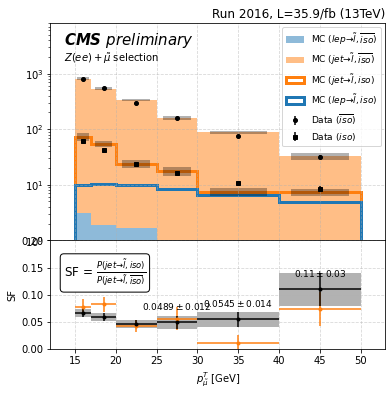

In [73]:
fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[2,1]},
                         figsize=(6,6))
fig.subplots_adjust(hspace=0)
a,b = 12,53

##############
# upper plot
##############
ax = axes[0]
# plot failing events
ax.hist([df.c,df.c], bins=binedges, 
         weights=[df.m_p/df.w/2,df.m_np/df.w/2],color=["C0","C1"],alpha=0.5,
         stacked=True,label=[r"MC ($lep \to \tilde{l}, \overline{iso}$)",r"MC ($jet\to \tilde{l},\overline{iso}$)"])
ax.errorbar(df.c, df.m_data/df.w/2, yerr=df.mVar_data**0.5/df.w/2, fmt='o',markersize=4,color='k',label=r"Data ($\overline{iso}$)")
ystd,y = (df.mVar_p+df.mVar_np)**0.5/df.w/2, (df.m_p+df.m_np)/df.w/2
ax.bar(df.c, 2*ystd, bottom=y-ystd,width=df.w*2*0.7, color='k',alpha=0.3)
ynorm= max(y)
# plot passing events
ax.hist([df.c,df.c], bins=binedges, 
         weights=[df.n_p/df.w/2,df.n_np/df.w/2],color=["C0","C1"],linewidth=3,
         stacked=True,histtype="step",label=[r"MC ($lep \to \tilde{l},iso$)",r"MC ($jet \to \tilde{l},iso$)"])
ax.errorbar(df.c, df.n_data/df.w/2,yerr=df.nVar_data**0.5/df.w/2, fmt='s',markersize=4, color='k',label=r"Data (${iso}$)")
ystd,y = (df.nVar_p+df.nVar_np)**0.5/df.w/2, (df.n_p+df.n_np)/df.w/2
ax.bar(df.c, 2*ystd, bottom=y-ystd,width=df.w*2*0.7, color='k',alpha=0.3)
ynorm= max(ynorm,max(y))

# setting
ax.legend(fontsize=9)
ax.grid(True,linestyle='--',alpha=0.5)
ax.set_yscale("log")
ax.set_ylim(1,10*ynorm)
ax.set_xlim(a,b)
ax.text(0.04*b+0.96*a, 4*ynorm, 
        r'CMS $preliminary$',
        style='italic',fontsize='15',fontweight='bold')
ax.set_title('Run 2016, L=35.9/fb (13TeV)',loc='right')
ax.text(0.04*b+0.96*a,2*ynorm, subtitle+r" selection")



##############
# lower plot
##############
ax = axes[1]
y,ystd = df.r_np, df.rVar_np**0.5
# ax.bar(df.c, 2*ystd, bottom=y-ystd, width= 2*df.w, color="C1", alpha=0.2)
ax.errorbar(df.c, y, yerr=ystd, xerr=df.w, color="C1", fmt=".", alpha=1)

y,ystd = df.r_data, df.rVar_data**0.5
ax.errorbar(df.c, y, yerr=ystd, xerr=df.w, color="k", fmt=".")
ax.bar(df.c, 2*ystd, bottom=y-ystd, width= 2*df.w, color="k", alpha=0.3)
for i in np.arange(3,len(y)):
    ax.text(df.c[i], y[i]+0.1*ynormSF, r"${:4.3}\pm{:4.2}$".format(y[i],ystd[i]), fontsize=9, ha="center", va="bottom")


ax.grid(True,linestyle='--',alpha=0.5)

ax.set_ylim(0,ynormSF)
ax.set_xlabel(configs[4][-1])
ax.text(0.04*b+0.96*a,0.7*ynormSF,r"SF = $\frac{P(jet \to \tilde{l},iso )} {P(jet \to \tilde{l}, \overline{iso})} $",fontsize=12,
       ha="left", va="center",bbox=dict(boxstyle="round",
                   ec='k',fc="w",
                   ))
ax.set_ylabel("SF")
plt.savefig("../plots/kinematics/{}/sf.pdf".format(selection))
plt.savefig("../plots/kinematics/{}/sf.png".format(selection),dpi=300)

In [34]:
df.c

0    35.0
1    45.0
2    55.0
Name: c, dtype: float64

In [19]:
ystd

0          NaN
1          NaN
2    59.468239
3     0.842981
4     0.549737
5     0.950498
Name: rVar_data, dtype: float64

In [38]:
print(y,ystd)

0    0.181294
1    0.149539
2    0.165486
3    0.170661
4    0.310527
5    0.412030
Name: r_data, dtype: float64 0    0.017698
1    0.015917
2    0.016917
3    0.025319
4    0.037801
5    0.078167
Name: rVar_data, dtype: float64


In [9]:
df

,Unnamed: 0,a,b,c,mVar_data,mVar_np,mVar_p,m_data,m_np,m_p,...,nVar_np,nVar_p,n_data,n_np,n_p,rVar_data,rVar_np,r_data,r_np,w
0,0,15.0,17.0,16.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,1.0
1,1,17.0,20.0,18.5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,1.5
2,2,20.0,25.0,22.5,0.0,0.000000,0.000131,0.0,0.000000,0.019070,...,6.110431,0.006061,1.0,-2.471929,0.119295,3536.471417,NaN,-46.182819,-inf,2.5
3,3,25.0,30.0,27.5,10.0,23.660164,0.096938,10.0,0.188503,1.591591,...,81.960232,1.645092,37.0,19.640731,27.988795,0.710618,7.231011e+06,1.071690,104.193230,2.5
4,4,30.0,40.0,35.0,39.0,108.137582,0.321863,39.0,16.699824,5.231281,...,153.289757,5.590423,165.0,25.747360,93.959222,0.302211,1.471364e+00,2.103745,1.541774,5.0
5,5,40.0,50.0,45.0,21.0,19.634240,0.176724,21.0,7.678377,2.919584,...,103.781357,4.616572,128.0,34.394819,77.881082,0.903447,8.442520e+00,2.772000,4.479439,5.0
